(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


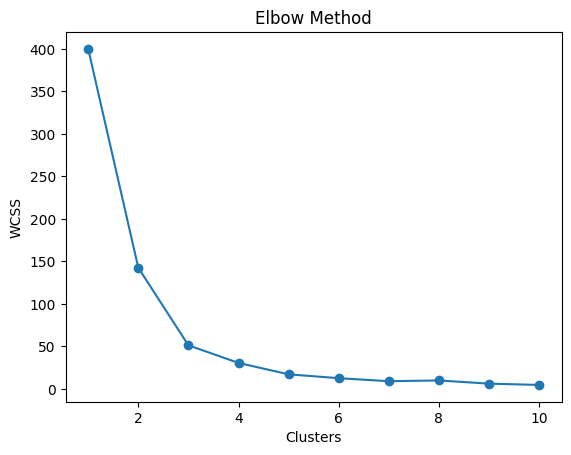

     Gender  Age  EstimatedSalary  Cluster
0         1   19            19000        1
1         1   35            20000        1
2         0   26            43000        1
3         0   27            57000        0
4         1   19            76000        0
..      ...  ...              ...      ...
395       0   46            41000        1
396       1   51            23000        1
397       0   50            20000        1
398       1   36            33000        1
399       0   49            36000        1

[400 rows x 4 columns]


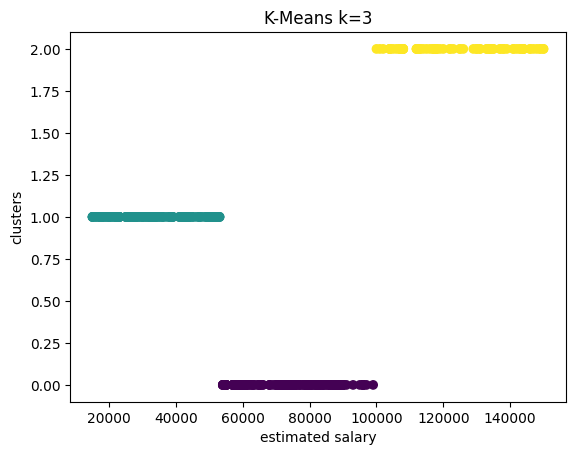

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
print(df.info())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["EstimatedSalary"]]

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scale)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scale)
print(df[['Gender','Age','EstimatedSalary', 'Cluster']])

plt.scatter(df['EstimatedSalary'],df['Cluster'], c=df['Cluster'])
plt.title("K-Means k=3")
plt.xlabel("estimated salary")
plt.ylabel("clusters")
plt.show()
